In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import os
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
os.getcwd()

'/home/shanks/data-science/PyTorchPractice/CNN/Image Classification'

In [2]:
transform = transforms.Compose([
    transforms.Resize(32),
    transforms.Grayscale(num_output_channels=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

In [3]:
batch_size = 4
trainset = torchvision.datasets.ImageFolder(root='Data-binary/train', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.ImageFolder(root='Data-binary/test', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=True)
classes = ['Positive', 'Negative']

Positive Negative 
Negative Positive


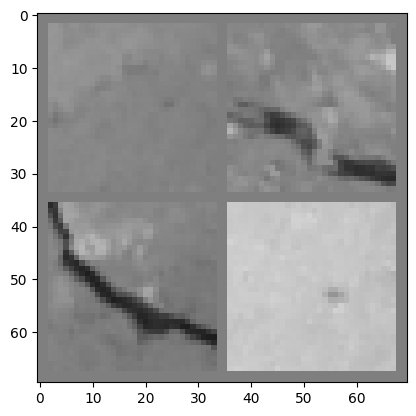

In [4]:
def imshow(img, lab):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    print(classes[lab[0]], classes[lab[1]],'\n'+ classes[lab[2]], classes[lab[3]])
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(trainloader)
images, labels = next(dataiter)
imshow(torchvision.utils.make_grid(images, nrow=2), labels)

In [5]:
class ImageClassificationNet(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

In [6]:
model = ImageClassificationNet()      
loss_fn = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.8)

In [7]:
NUM_EPOCHS = 10
for epoch in range(NUM_EPOCHS):
    for i, data in enumerate(trainloader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        
        loss = loss_fn(outputs, labels.reshape(-1, 1).float())
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch {epoch}/{NUM_EPOCHS}, Step {i+1}/{len(trainloader)},' f'Loss: {loss.item():.4f}')

Epoch 0/10, Step 1/250,Loss: 0.6953
Epoch 0/10, Step 101/250,Loss: 0.6778
Epoch 0/10, Step 201/250,Loss: 0.6928
Epoch 1/10, Step 1/250,Loss: 0.6815
Epoch 1/10, Step 101/250,Loss: 0.6915
Epoch 1/10, Step 201/250,Loss: 0.6989
Epoch 2/10, Step 1/250,Loss: 0.6944
Epoch 2/10, Step 101/250,Loss: 0.6890
Epoch 2/10, Step 201/250,Loss: 0.6866
Epoch 3/10, Step 1/250,Loss: 0.6813
Epoch 3/10, Step 101/250,Loss: 0.6800
Epoch 3/10, Step 201/250,Loss: 0.6888
Epoch 4/10, Step 1/250,Loss: 0.6811
Epoch 4/10, Step 101/250,Loss: 0.6761
Epoch 4/10, Step 201/250,Loss: 0.6662
Epoch 5/10, Step 1/250,Loss: 0.6539
Epoch 5/10, Step 101/250,Loss: 0.6839
Epoch 5/10, Step 201/250,Loss: 0.6554
Epoch 6/10, Step 1/250,Loss: 0.6395
Epoch 6/10, Step 101/250,Loss: 0.6937
Epoch 6/10, Step 201/250,Loss: 0.5256
Epoch 7/10, Step 1/250,Loss: 0.5135
Epoch 7/10, Step 101/250,Loss: 0.4595
Epoch 7/10, Step 201/250,Loss: 0.3482
Epoch 8/10, Step 1/250,Loss: 0.4502
Epoch 8/10, Step 101/250,Loss: 0.5283
Epoch 8/10, Step 201/250,Loss:

In [8]:
y_test = []
y_test_pred = []
for i, data in enumerate(testloader):
    inputs, y_test_temp = data
    with torch.no_grad():
        y_test_hat_temp = model(inputs).round()
    
    y_test.extend(y_test_temp.numpy())
    y_test_pred.extend(y_test_hat_temp.numpy())

In [9]:
acc = accuracy_score(y_test, y_test_pred)
print(f'Accuracy: {acc*100: .2f}%')

Accuracy:  87.83%


In [11]:
import tensorflow as tf

2024-08-18 15:46:34.565236: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-18 15:46:34.579108: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-18 15:46:34.582839: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-18 15:46:34.594213: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-18 15:46:35.320453: W tensorflow/compiler/tf2

In [27]:
tf.saved_model.save(model, 'Sasta-Model')

ValueError: Expected an object of type `Trackable`, such as `tf.Module` or a subclass of the `Trackable` class, for export. Got ImageClassificationNet(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (sigmoid): Sigmoid()
) with type <class '__main__.ImageClassificationNet'>.

In [26]:

# Load the TensorFlow SavedModel
model = tf.saved_model.load('/home/shanks/data-science/PyTorchPractice/CNN/Image Classification/sasta_model')


# Convert the model to TensorFlow Lite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Optional: Apply optimization
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# Convert and save the model
tflite_model = converter.convert()
with open('/home/shanks/data-science/PyTorchPractice/CNN/Image Classification/sasta_model.tflite', 'wb') as f:
    f.write(tflite_model)


ValueError: File format not supported: filepath=/home/shanks/data-science/PyTorchPractice/CNN/Image Classification/sasta_model.pb. Keras 3 only supports V3 `.keras` files and legacy H5 format files (`.h5` extension). Note that the legacy SavedModel format is not supported by `load_model()` in Keras 3. In order to reload a TensorFlow SavedModel as an inference-only layer in Keras 3, use `keras.layers.TFSMLayer(/home/shanks/data-science/PyTorchPractice/CNN/Image Classification/sasta_model.pb, call_endpoint='serving_default')` (note that your `call_endpoint` might have a different name).